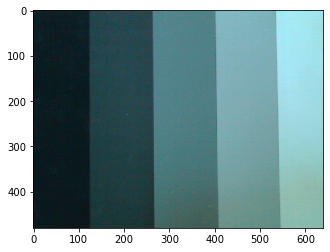

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

def einlesen(bild):
    img = imageio.imread(bild)
    img = img.astype('double')
    return img

def ausgeben(img):
    plt.imshow(img/gbild.max())
    plt.show()


gbild = einlesen('opencv_frame_0.png')
ausgeben(gbild)

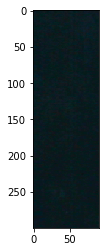

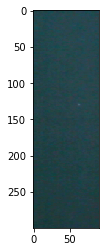

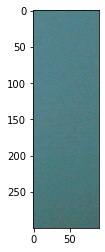

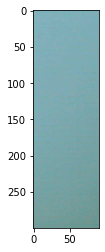

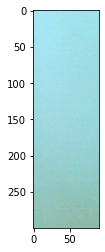

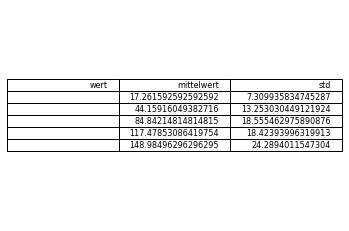

In [22]:
def tabellisieren(ausschnitte):
    fig, ax = plt.subplots()
    table_data = [["wert", "mittelwert", "std"]]
    for i in ausschnitte:
        table_data.append(werteBestimmen(i))
    table = ax.table(cellText=table_data, loc='center')
    ax.axis('off')
    plt.show()
    
def werteBestimmen(bild):
    mittelwert = np.mean(bild)
    std = np.std(bild)
    return ["", mittelwert, std]

def stufenAuslesen(gbild):
    pblack = gbild[100:400, 10:100]
    pdgrey = gbild[100:400, 145:235]
    pmgrey = gbild[100:400, 290:380]
    plgrey = gbild[100:400, 420:510]
    pwhite = gbild[100:400, 550:640]
    ausschnitte = [pblack, pdgrey, pmgrey, plgrey, pwhite]
    return ausschnitte

ausschnitte = stufenAuslesen(gbild)
for p in ausschnitte:
    ausgeben(p)
tabellisieren(ausschnitte)



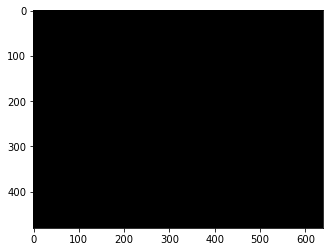

hotpixels: []


In [23]:
def mittelwert(bilder):
    img = []
    for idx,i in enumerate(bilder):
        img.append(i)
        if (idx == 0):
            a = img[idx]
        else:
            a += img[idx]
    dunkelbild = a/10
    return dunkelbild

dunkelbilder = []
for i in range(10):
    dunkelbilder.append(einlesen(f'Dunkelbild{i}.png'))

dbild = mittelwert(dunkelbilder)
ausgeben(dbild)
dbild

hotpixels = []
for x in np.nditer(dbild):
    if (x > 5 ):
        hotpixels.append(x)
print("hotpixels:" , hotpixels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


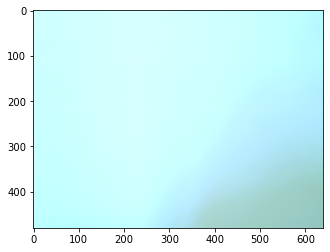

deadpixels: []


In [24]:
def weissbild(bilder, dunkelbild):
    wbild = mittelwert(bilder) - dunkelbild
    imageio.imwrite('weissbild.png', wbild.astype('uint8'))
    return wbild

weissbilder = []
for i in range(10):
    weissbilder.append(einlesen(f'opencv_white_{i}.png'))

wbild = weissbild(weissbilder, dbild)
ausgeben(wbild)
wbild

#deadpixels: Wert <= 50, hotpixels: Wert >= 5
deadpixels = []
for x in np.nditer(wbild):
    if (x <= 50):
        deadpixels.append(x)
print("deadpixels:" , deadpixels)
        

[[[0.81659533 1.08598217 1.24518927]
  [0.81554098 1.085455   1.24466209]
  [0.80341594 1.0875637  1.24202621]
  ...
  [0.70430688 0.97949266 1.09599851]
  [0.69798077 0.98265571 1.09652569]
  [0.69798077 0.98265571 1.09652569]]

 [[0.82344862 1.09230828 1.2530969 ]
  [0.82292144 1.09178111 1.25256973]
  [0.81448663 1.09810721 1.25204255]
  ...
  [0.71748628 0.99214488 1.10970508]
  [0.70694276 0.99056335 1.10390615]
  [0.70694276 0.99056335 1.10390615]]

 [[0.83135625 1.11550402 1.27154806]
  [0.83241061 1.11603119 1.27207523]
  [0.82661167 1.11603119 1.28051005]
  ...
  [0.74068201 0.99899816 1.11972142]
  [0.74015484 0.99688946 1.11181379]
  [0.74015484 0.99688946 1.11181379]]

 ...

 [[0.76176905 1.06753102 1.21724895]
  [0.76124187 1.06647667 1.2161946 ]
  [0.76229622 1.06120491 1.21145001]
  ...
  [0.58674668 0.80025288 0.76809516]
  [0.58463797 0.80130723 0.76809516]
  [0.58463797 0.80130723 0.76809516]]

 [[0.75649729 1.06858537 1.21092284]
  [0.75597011 1.06805819 1.20934131]


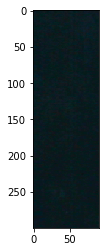

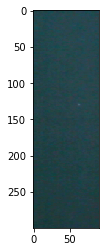

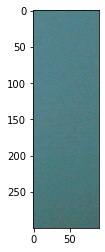

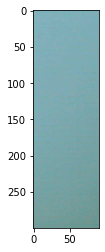

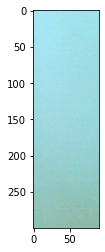

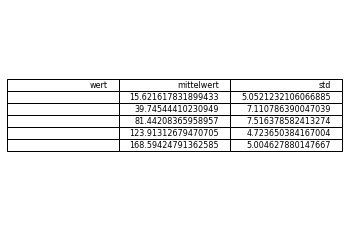

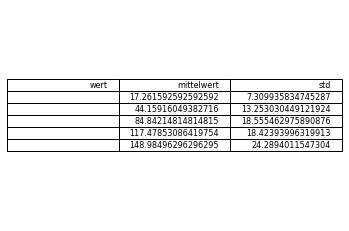

In [25]:
def verbessert(dunkelbild, weissbild, eingabebild):
    weissbild = normieren(weissbild)
    img = eingabebild - dunkelbild
    img = img/weissbild
    return img

def normieren(weissbild):
    mean = np.mean(weissbild)
    for idx, i in enumerate(weissbild):
        weissbild[idx] = i / mean
    return weissbild

print(normieren(wbild))
print("Mittelwert: ", np.mean(normieren(wbild)))
imgv = verbessert(dbild, wbild, gbild)
imageio.imsave('grauwertverbessert.png', imgv.astype('uint8'))
plt.imshow(imgv/imgv.max())

abschnittev = stufenAuslesen(imgv)
for p in ausschnitte:
    ausgeben(p)
tabellisieren(abschnittev)
tabellisieren(ausschnitte)